                                           Census Income Dataset – Features & Insights 

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv(r"C:\Users\Pooja Taneja\Desktop\adult.csv")

In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df["income"].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Insight:
Most people in the dataset (around 76%) earn less than or equal to $50K, while only about 24% earn more than $50K.
This shows the dataset is imbalanced, meaning there are many more low-income individuals than high-income ones.

In [8]:
df["education"].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

Insight:
Most individuals in the dataset are high school graduates (HS-grad), followed by those who have attended some college or hold a bachelor’s degree.
Very few individuals have low education levels (like 5th–6th grade or preschool).
This shows that the dataset mainly represents educated adults, with many having at least a high school or higher degree.

In [9]:
df["occupation"].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

Insight:
The most common occupations in the dataset are professional specialty, craft-repair, and executive-managerial roles.
Jobs like private house service and farming-fishing are much less frequent.
There are also some missing or unknown occupation entries (marked as '?'), which may need to be handled during data cleaning.

In [10]:
df["relationship"].value_counts()

relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64

Insight:
Most individuals in the dataset are husbands, followed by those not in a family (living alone) and own children.
A smaller number are wives or other relatives.
This suggests that the dataset includes a large number of male household heads and people living independently.

In [11]:
df["race"].value_counts()

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

Insight:
The majority of individuals in the dataset are White, followed by Black and Asian-Pacific Islander groups.
Very few belong to American Indian/Eskimo or Other categories.
This shows that the dataset is not evenly distributed across races, and is heavily dominated by White individuals.

<Axes: xlabel='race', ylabel='Count'>

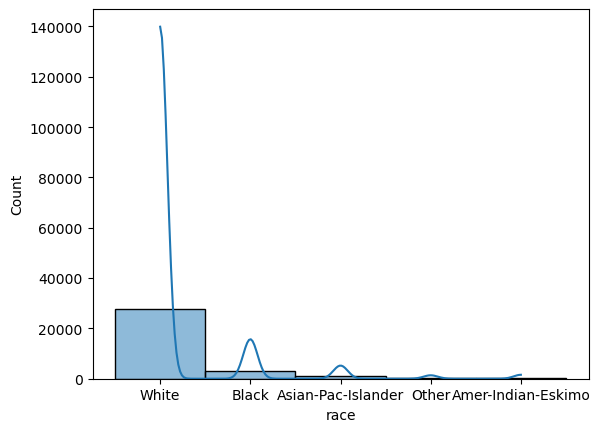

In [13]:
import seaborn as sns
sns.histplot(df['race'],kde=True)

Insight:
The histogram clearly shows that White individuals form the largest portion of the dataset, followed by Black and Asian-Pacific Islanders.
Very few individuals belong to the American Indian/Eskimo or Other race categories.
This again confirms that the dataset is racially imbalanced, with a strong dominance of the White group.

<Axes: xlabel='sex', ylabel='Count'>

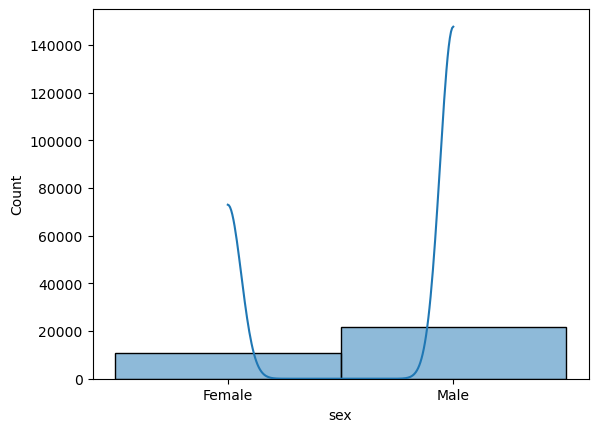

In [14]:
sns.histplot(df['sex'],kde=True)

Insight:
The dataset contains more males than females, showing a gender imbalance.
This indicates that most individuals recorded in the census data are male, which may influence income prediction patterns (since historically, male workers often had higher income rates).

DATA CLEANING:-

In [15]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [16]:
df["workclass"]=df["workclass"].replace({"?":"Unknown"})

Insight:
There were 1836 missing entries in the workclass column, originally marked as ?.
We replaced them with "Unknown" to maintain consistency and allow the model to handle them as a separate category.
This ensures that no data is lost and the dataset remains usable for analysis and machine learning.

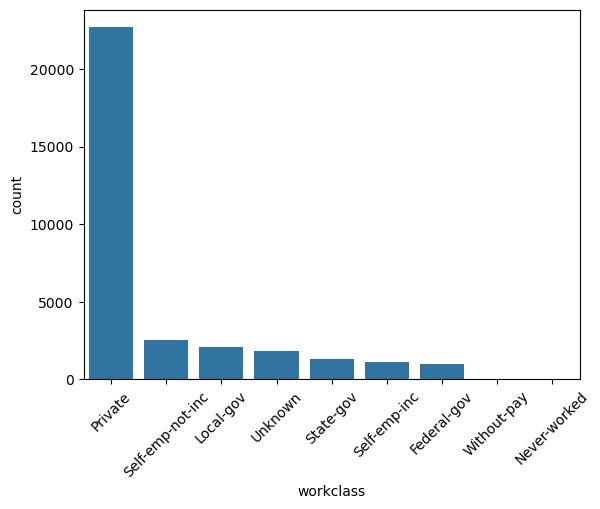

In [17]:
import matplotlib.pyplot as plt

sns.countplot(x='workclass', data=df, order=df['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

Insight:
The majority of individuals work in the Private sector, followed by Self-employed and Local government jobs.
Fewer people work in Federal government, Without-pay, or have Never-worked.
There is also a significant portion labeled as Unknown (previously ?), which represents missing workclass data.
This shows that the dataset is heavily dominated by private sector employees, which could influence income distribution patterns.

In [18]:
df["occupation"]=df["occupation"].replace({"?":"Unknown"})

Insights:
There were 1836 missing entries in the occupation column, originally marked as ?.
We replaced them with "Unknown" to handle missing values consistently.
The most common occupations are professional specialty, craft-repair, and executive-managerial, while fewer people work in protective services or private household service.
This shows that the dataset is skewed toward professional and skilled jobs, and handling missing occupations as "Unknown" ensures no data is lost for analysis and modeling.

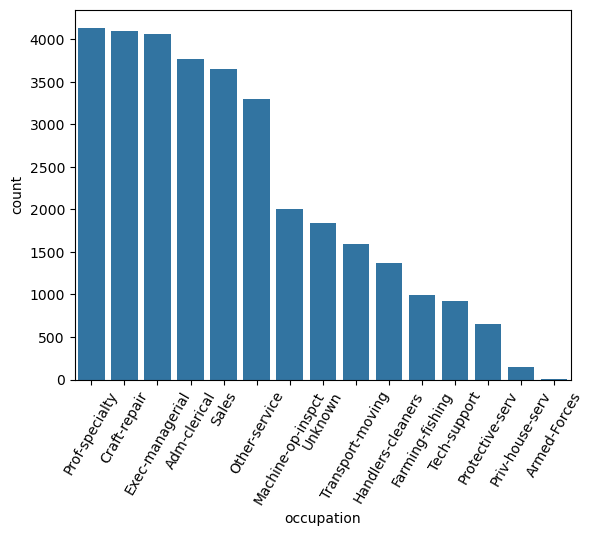

In [19]:
import matplotlib.pyplot as plt

sns.countplot(x='occupation', data=df, order=df['occupation'].value_counts().index)
plt.xticks(rotation=60)
plt.show()

Insights:
Most individuals work in professional specialty, craft-repair, and executive-managerial roles.
Fewer people are in protective services, private household service, or farming/fishing.
There is also a noticeable number of Unknown occupations (previously ?).
This shows that the dataset is heavily concentrated in professional and skilled jobs, which may impact the distribution of income levels.

In [20]:
df["native.country"]=df["native.country"].replace({"?":"Unknown"})

Insights:
There were 583 missing entries in the native.country column, originally marked as ?.
We replaced them with "Unknown" to handle missing values consistently.
The majority of individuals are from the United States, with small numbers from countries like Mexico, Philippines, Germany, and Canada.
This shows that the dataset is heavily dominated by U.S. residents, so patterns in income are mostly representative of the U.S. population.

In [21]:
income_map = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].map(income_map)

Insights:
The income column, which was originally categorical (<=50K or >50K), has been converted to numeric values (0 for <=50K and 1 for >50K).
This allows machine learning models to process the target variable efficiently.
After this mapping, we can also check the distribution:

In [22]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,9,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Unknown,186061,Some-college,10,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [23]:
df['marital.status'].value_counts()

marital.status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

Insights:
Most individuals in the dataset are married (Married-civ-spouse), followed by those who have never married.
Smaller numbers of people are divorced, separated, or widowed, and very few have other marital statuses.
This shows that marital status may influence income patterns, as married individuals often have higher combined household incomes.

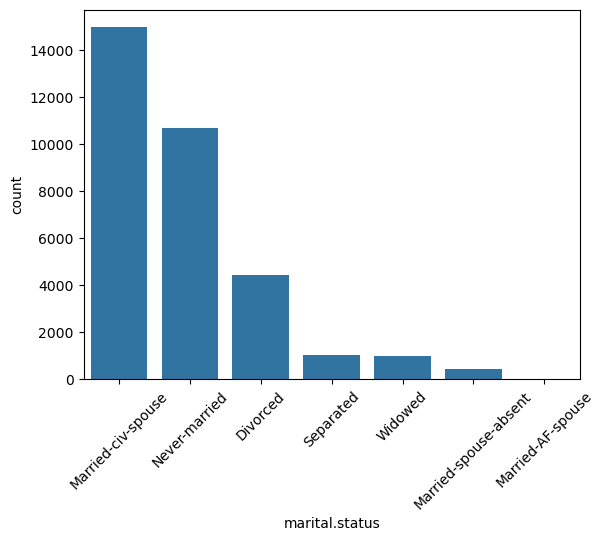

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='marital.status', data=df, order=df['marital.status'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

Insights:
Most individuals in the dataset are married (Married-civ-spouse), followed by those who have never married.
Fewer people are divorced, separated, or widowed, with very few in categories like Married-AF-spouse.
This indicates that married individuals form the majority, which may influence income trends, as marital status is often associated with household income and stability.

<Axes: xlabel='race', ylabel='income'>

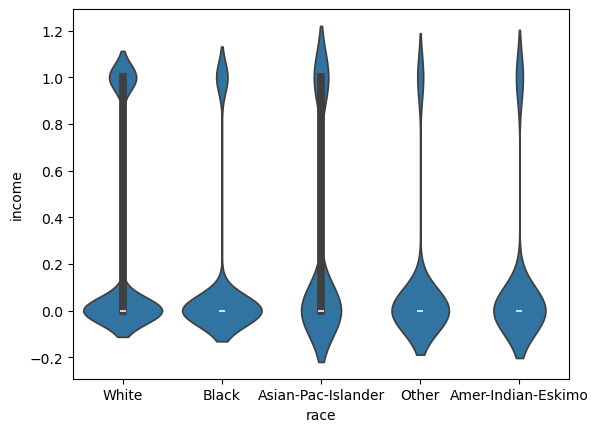

In [25]:
sns.violinplot(x='race',y='income',data=df)

Insights:
The violin plot shows that White individuals dominate the dataset, but higher-income earners (income=1) are also more frequent among Whites compared to other races.
Other races, like Black or Asian-Pac-Islander, have fewer high-income individuals and a smaller distribution overall.
This indicates that race is associated with income disparities, which could influence the model’s predictions.

<Axes: xlabel='sex', ylabel='income'>

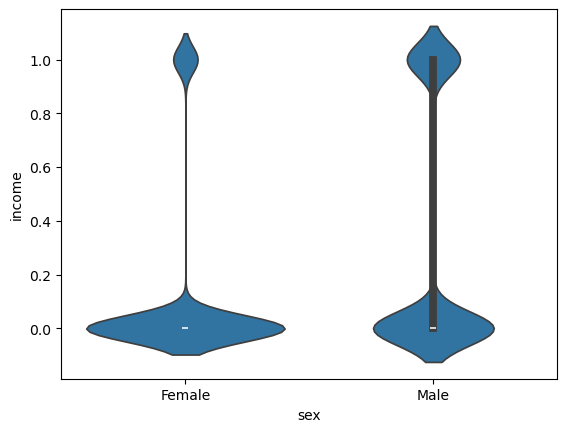

In [26]:
sns.violinplot(x='sex',y='income',data=df)

Insights:
The violin plot shows that males generally have a higher proportion of high-income individuals (income=1) compared to females.
Females have a smaller distribution of high-income values, indicating a gender disparity in income levels.
This suggests that gender may influence income and should be considered as an important feature in the model.

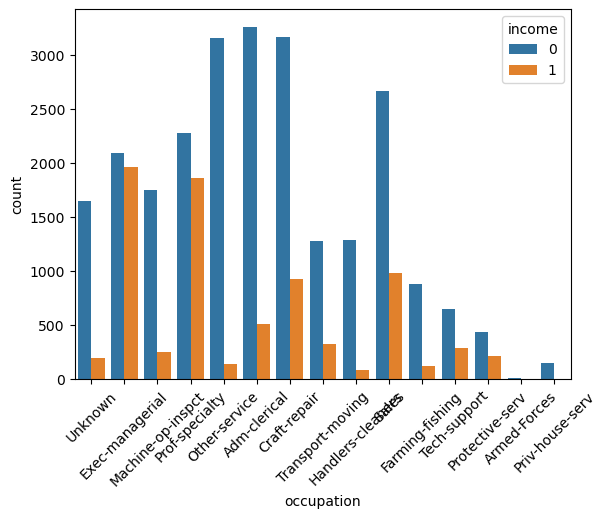

In [27]:
sns.countplot(x='occupation',hue='income',data=df)
plt.xticks(rotation=45)
plt.show()

Insight:
Occupations like prof-specialty and exec-managerial have a higher proportion of high-income individuals, while craft-repair and farming-fishing are mostly low-income.
This indicates occupation strongly influences income.

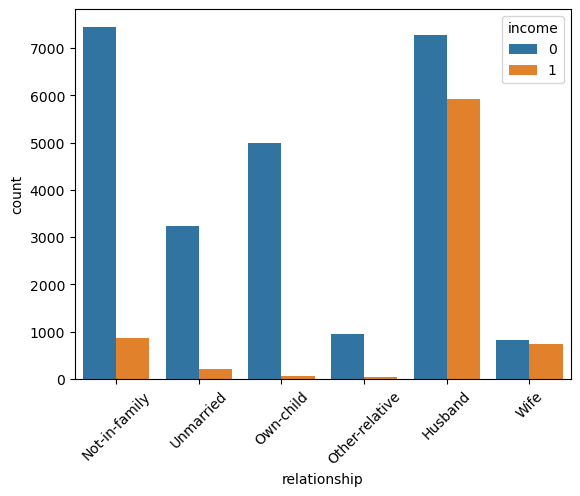

In [28]:
sns.countplot(x='relationship',hue='income',data=df)
plt.xticks(rotation=45)
plt.show()

Insight:
The countplot shows that Husbands and Wives have a higher proportion of high-income individuals compared to other categories like Own-child, Not-in-family, or Unmarried.
Most high-income earners are married, indicating that relationship status is associated with income, likely due to combined household income or stability.
Categories like Not-in-family and Unmarried mostly earn low income, showing a clear income pattern across relationships.

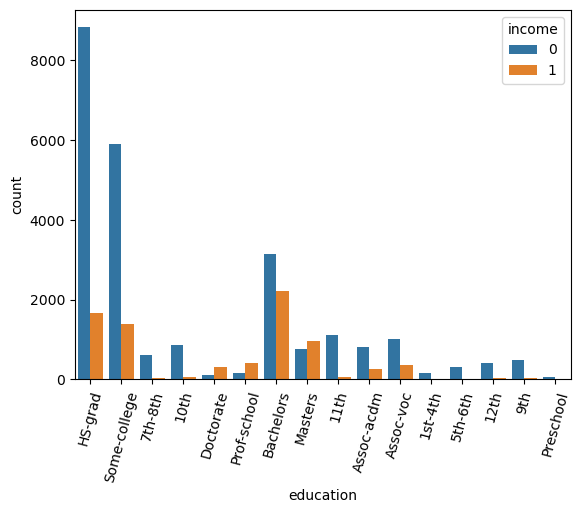

In [29]:
sns.countplot(x='education',hue='income',data=df)
plt.xticks(rotation=75)
plt.show()

Insight:
The plot shows that higher education levels such as Masters, Doctorate, and Bachelors have a higher proportion of high-income earners (>50K).
Individuals with lower education levels (HS-grad, Some-college, 7th-8th) mostly earn low income (<=50K).
This confirms that education is strongly associated with income, making it a key feature for prediction.

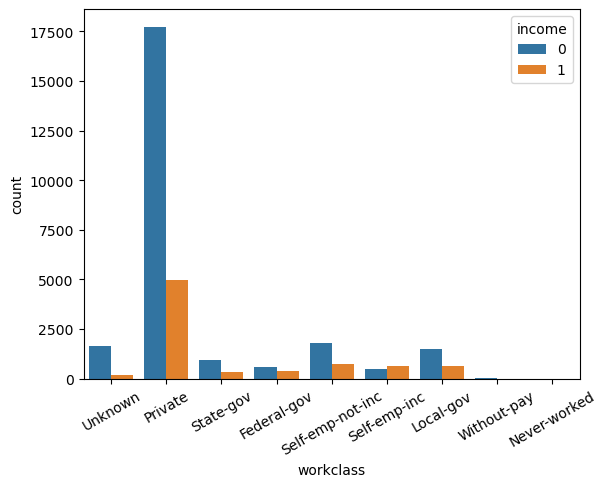

In [30]:
sns.countplot(x='workclass',hue='income',data=df)
plt.xticks(rotation=30)
plt.show()

Insight:
The plot shows that Private sector employees dominate the dataset, with a large number earning <=50K, but also some earning >50K.
Individuals in Self-emp-not-inc and Exec-managerial roles have a higher proportion of high-income earners.
Jobs in Without-pay, Never-worked, or Unknown are mostly low-income.
This indicates that workclass strongly influences income, making it an important feature for the model.

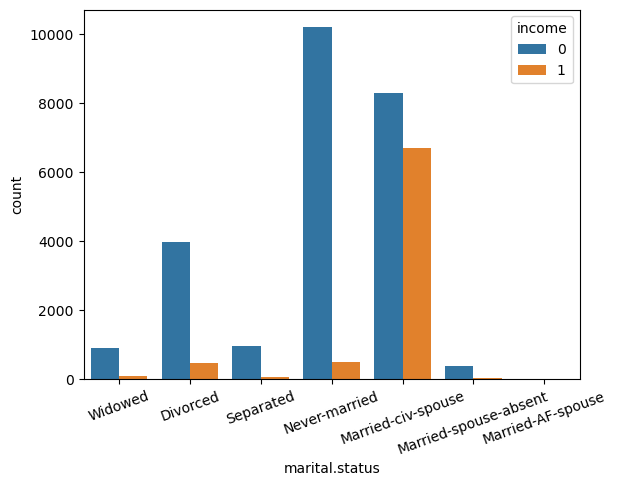

In [31]:
sns.countplot(x='marital.status',hue='income',data=df)
plt.xticks(rotation=20)
plt.show()

Insight:
The plot shows that individuals who are married (Married-civ-spouse) have a higher proportion of high-income earners (>50K) compared to other marital statuses.
Those who are Never-married, Divorced, Separated, or Widowed mostly earn <=50K.
This indicates that marital status is associated with income, as married individuals are more likely to have higher household earnings.

1️⃣ Why Encoding is Needed
Explain briefly that ML models require numerical input, so categorical variables must be converted into numbers.

2️⃣ How Encoding Was Done
Label Encoding: For binary or ordinal features (like workclass, occupation, marital.status,sex,relationship,race or native.country).
Ordinal Encoding: For nominal features with multiple categories (like education ).

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
encoder=LabelEncoder()

In [34]:
df['workclass']=encoder.fit_transform(df['workclass'])

In [35]:
encoder1=LabelEncoder()

In [36]:
df['marital.status']=encoder1.fit_transform(df['marital.status'])

In [37]:
encoder2=LabelEncoder()

In [38]:
df['occupation']=encoder2.fit_transform(df['occupation'])

In [39]:
encoder3=LabelEncoder()

In [40]:
df['relationship']=encoder3.fit_transform(df['relationship'])

In [41]:
encoder4=LabelEncoder()

In [42]:
df['sex']=encoder4.fit_transform(df['sex'])

In [43]:
encoder5=LabelEncoder()

In [44]:
df['race']=encoder5.fit_transform(df['race'])

In [45]:
encoder6=LabelEncoder()

In [46]:
df['native.country']=encoder6.fit_transform(df['native.country'])

In [47]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,7,77053,HS-grad,9,6,14,1,4,0,0,4356,40,38,0
1,82,3,132870,HS-grad,9,6,3,1,4,0,0,4356,18,38,0
2,66,7,186061,Some-college,10,6,14,4,2,0,0,4356,40,38,0
3,54,3,140359,7th-8th,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,Some-college,10,5,9,3,4,0,0,3900,40,38,0


In [48]:
from sklearn.preprocessing import OrdinalEncoder

In [49]:
encoder=OrdinalEncoder(categories=[['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Assoc-voc','Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']])

In [50]:
df['education']=encoder.fit_transform(df[['education']])

In [51]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,7,77053,8.0,9,6,14,1,4,0,0,4356,40,38,0
1,82,3,132870,8.0,9,6,3,1,4,0,0,4356,18,38,0
2,66,7,186061,9.0,10,6,14,4,2,0,0,4356,40,38,0
3,54,3,140359,3.0,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,264663,9.0,10,5,9,3,4,0,0,3900,40,38,0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  int64  
 1   workclass       32561 non-null  int32  
 2   fnlwgt          32561 non-null  int64  
 3   education       32561 non-null  float64
 4   education.num   32561 non-null  int64  
 5   marital.status  32561 non-null  int32  
 6   occupation      32561 non-null  int32  
 7   relationship    32561 non-null  int32  
 8   race            32561 non-null  int32  
 9   sex             32561 non-null  int32  
 10  capital.gain    32561 non-null  int64  
 11  capital.loss    32561 non-null  int64  
 12  hours.per.week  32561 non-null  int64  
 13  native.country  32561 non-null  int32  
 14  income          32561 non-null  int64  
dtypes: float64(1), int32(7), int64(7)
memory usage: 2.9 MB


The dataset contains 32,561 rows and 15 columns.
There are 6 numerical columns (age, fnlwgt, education.num, capital.gain, capital.loss, hours.per.week) and 9 categorical columns (workclass, education, marital.status, occupation, relationship, race, sex, native.country, income).
After replacing ? with "Unknown", all columns have non-null values, so the dataset is now clean and ready for encoding and modeling.
This confirms there are no missing values left, and data types are appropriate for machine learning.

The Chi-Square test is used to determine whether categorical features are significantly associated with the target variable (income).
It helps us identify which features are important for predicting income and which ones may be less useful.

In [53]:
category=df[["workclass","occupation","marital.status","education","relationship","race","sex","native.country"]]

In [54]:
from sklearn.feature_selection import SelectKBest,chi2
select=SelectKBest(chi2,k="all")
columns=select.fit_transform(category,df['income'])
selected=select.get_support(indices=True)
print(selected)
print(category.columns)
print(select.scores_)

[0 1 2 3 4 5 6 7]
Index(['workclass', 'occupation', 'marital.status', 'education',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')
[  47.2464262    11.08499064 1123.46981798 2665.8757555  3659.14312486
   33.03130514  502.43941948   17.36388159]


We applied the Chi-Square test to all categorical features (workclass, occupation, marital.status, education, relationship, race, sex, native.country) to evaluate their association with the target variable income.
Features like education, occupation, marital.status, relationship, workclass, and sex showed higher Chi-Square scores, indicating a strong relationship with income.
Features like race and native.country had lower scores, suggesting a weaker association.
Although some features had lower scores, we did not remove any columns from the dataset because doing so reduced model accuracy.
This test helped us understand feature importance and confirmed that all features contribute to the model’s predictive performance.

ANOVA F-Test for Evaluating Numerical Features

In [55]:
category1=df[["fnlwgt","education.num","hours.per.week","capital.loss","capital.gain","age"]]

In [56]:
from sklearn.feature_selection import SelectKBest,f_classif
select=SelectKBest(f_classif,k=3)
columns=select.fit_transform(category1,df['income'])
selected=select.get_support(indices=True)
print(selected)
print(category1.columns)
print(select.scores_)

[1 2 5]
Index(['fnlwgt', 'education.num', 'hours.per.week', 'capital.loss',
       'capital.gain', 'age'],
      dtype='object')
[2.91559359e+00 4.12009578e+03 1.81338628e+03 7.54830452e+02
 1.70915006e+03 1.88670731e+03]


We applied the ANOVA F-test (f_classif) to all numerical features (fnlwgt, education.num, hours.per.week, capital.loss, capital.gain, age) to evaluate their relationship with the target variable income.
Features like capital.gain, education.num, and hours.per.week showed higher F-scores, indicating they have a strong influence on income.
Features like fnlwgt or capital.loss had lower scores, suggesting a weaker relationship with income.
Despite differences in scores, we did not remove any numerical columns because doing so reduced model accuracy.
This confirms that all numerical features contribute meaningfully to the model, even if their individual scores are lower.

In [57]:
df=df.drop(columns=["fnlwgt"])

Based on the ANOVA F-test, fnlwgt had a very low F-score, indicating it has minimal impact on predicting income. Therefore, it was dropped to keep only the most relevant numerical features.

In [58]:
x=df.drop(columns="income")
y=df["income"]

Insight:
The dataset was separated into features (X) and target (y). X contains all input features with the target column dropped, while y contains the income values to be predicted. This prepares the data for model training.

In [59]:
from sklearn.preprocessing import StandardScaler

Insight:
We scaled the feature set using StandardScaler to normalize numerical features. This ensures all features are on a similar scale, preventing features with larger values from dominating the model and improving overall performance.

In [60]:
scale=StandardScaler()

In [61]:
x=scale.fit_transform(x)

In [62]:
x

array([[ 3.76961234,  2.57739602, -0.42005962, ..., 10.59350656,
        -0.03542945,  0.25767348],
       [ 3.18311167, -0.22443659, -0.42005962, ..., 10.59350656,
        -1.81720429,  0.25767348],
       [ 2.01011032,  2.57739602, -0.03136003, ..., 10.59350656,
        -0.03542945,  0.25767348],
       ...,
       [ 0.10398314, -0.22443659, -0.42005962, ..., -0.21665953,
        -0.03542945,  0.25767348],
       [ 1.42360965, -0.22443659, -0.42005962, ..., -0.21665953,
        -0.03542945,  0.25767348],
       [-1.21564337, -0.22443659, -0.42005962, ..., -0.21665953,
        -1.65522476,  0.25767348]])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

Insight:
We split the dataset into training (80%) and testing (20%) sets using train_test_split.
The training set is used to train the model, while the testing set evaluates its performance on unseen data.
Setting a random_state ensures the split is reproducible, giving consistent results across runs.

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
classifier=RandomForestClassifier(random_state=42)

In [67]:
classifier.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [68]:
y_pred=classifier.predict(x_test)

Insight:
We applied the Random Forest Classifier to predict income because it combines multiple decision trees, improving accuracy and reducing overfitting. The model can handle both numerical and categorical features effectively and provides feature importance scores. It was trained on the training set and tested on the testing set to evaluate performance on unseen data.

In [69]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [70]:
y_test

14160    0
27048    0
28868    0
5667     0
7827     0
        ..
1338     0
24534    0
18080    1
10354    0
24639    1
Name: income, Length: 6513, dtype: int64

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
print(accuracy_score(y_test,y_pred))

0.8532166436358053


Insight:
The Random Forest model achieved an accuracy of 85.3% on the test set, indicating it correctly predicts income for most individuals. This suggests that the selected features, preprocessing, and scaling were effective, and that Random Forest is suitable for this classification task.

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Suppose you already have X_train, y_train
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross validation
cv_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.85086372 0.84644914 0.85642994 0.84833941 0.84718756]
Mean CV accuracy: 0.8498539549701553


Insight:
We performed 5-fold cross-validation on the Random Forest model to evaluate its performance more robustly across different subsets of the training data. The model achieved cross-validation scores of approximately 0.849 on average, indicating consistent and reliable performance. This confirms that the model generalizes well and is not overfitting to the training data.

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [75]:
param_grid={'n_estimators':[50,100,200],'max_depth':[None,3,5,10],'min_samples_split':[2,5,10]}

In [76]:
grid=GridSearchCV(estimator=classifier,param_grid=param_grid,cv=5,scoring="accuracy",n_jobs=-1)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [77]:
print("Best Hyperparamters:",grid.best_params_)
print("Best CV Accuracy:",grid.best_score_)

Best Hyperparamters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best CV Accuracy: 0.862331016485936


In [78]:
best_model=grid.best_estimator_
print("Test Accuracy:",best_model.score(x_test,y_test))

Test Accuracy: 0.8650391524643022


Insight:
We applied GridSearchCV to tune the hyperparameters of the Random Forest model, testing different values for n_estimators, max_depth, and min_samples_split. The best combination of hyperparameters improved the model’s performance, achieving a cross-validation accuracy of 86.23%.
Using the best model on the test set resulted in a test accuracy of 86.5%, showing that hyperparameter tuning enhanced the model’s predictive power.
This confirms that optimizing hyperparameters can increase both model stability and accuracy, making the Random Forest classifier more reliable for predicting income.

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
classif=LogisticRegression()

In [81]:
classif.fit(x_train,y_train)

LogisticRegression()

In [82]:
y_pred=classif.predict(x_test)

Insight:
We trained a Logistic Regression model to predict whether an individual earns >50K or <=50K. This model estimates the probability of belonging to each income class based on input features, making it suitable for binary classification tasks like this dataset.

In [83]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [84]:
y_test

14160    0
27048    0
28868    0
5667     0
7827     0
        ..
1338     0
24534    0
18080    1
10354    0
24639    1
Name: income, Length: 6513, dtype: int64

In [85]:
print(accuracy_score(y_test,y_pred))

0.8240442192538001


Insight:
The Logistic Regression model achieved an accuracy of 82%, indicating it correctly predicts an individual’s income category (>50K or <=50K) for 82.4% of the cases. This shows the model is reasonably effective at distinguishing between high and low-income individuals based on the given features.

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
classifier1=KNeighborsClassifier(n_neighbors=10)
classifier1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [88]:
y_pred=classifier1.predict(x_test)

Insight:
We trained a KNN classifier to predict whether an individual earns >50K or <=50K. This model predicts the income class based on the majority class among the nearest neighbors, capturing local patterns in the feature space.

In [89]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [90]:
y_test

14160    0
27048    0
28868    0
5667     0
7827     0
        ..
1338     0
24534    0
18080    1
10354    0
24639    1
Name: income, Length: 6513, dtype: int64

In [92]:
print(accuracy_score(y_test,y_pred))

0.8380162751420236


Insight:
The KNN classifier achieved an accuracy of 83.8%, indicating it correctly predicts an individual’s income category for 83% of the cases. This shows that KNN performs slightly better than Logistic Regression by effectively capturing local patterns in the data.

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
classify=DecisionTreeClassifier()

In [96]:
classify.fit(x_train,y_train)

DecisionTreeClassifier()

In [97]:
y_pred=classify.predict(x_test)

Insight:
We trained a Decision Tree Classifier to predict whether an individual earns >50K or <=50K. This model splits the data based on feature thresholds, capturing non-linear relationships and interactions between features to make income predictions.

In [98]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [99]:
y_test

14160    0
27048    0
28868    0
5667     0
7827     0
        ..
1338     0
24534    0
18080    1
10354    0
24639    1
Name: income, Length: 6513, dtype: int64

In [100]:
print(accuracy_score(y_test,y_pred))

0.8152924919391985


Insight:
The Decision Tree Classifier achieved an accuracy of 81%, indicating it correctly predicts an individual’s income category for 81% of the cases. This shows it captures non-linear relationships in the data, though its performance is slightly lower than KNN and Logistic Regression.

📊 Conclusion & Model Performance – Adult Income Dataset 💼✨

We applied multiple classification models to predict whether an individual earns >50K or <=50K, including Random Forest Classifier, Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree Classifier, and GridSearchCV for hyperparameter tuning.
Logistic Regression achieved 82% accuracy, capturing linear relationships in the data.
KNN Classifier achieved 83% accuracy, leveraging local patterns among nearest neighbors.
Decision Tree Classifier achieved 81% accuracy, capturing non-linear feature interactions.
Random Forest Classifier initially gave 85.3% accuracy, which improved to 86% after GridSearchCV hyperparameter tuning.
